# ASTR 3300 Final Project
### SeungJun Ryu (June)

### Proposal
  This final project is to comprehend the knowledge of data analysis and machine learning covered in ASTR 3300, Astro-statistics. Main goal for this project is to use machine learning to verify RRL stars from variable stars data. The target dataset is GAIA Data Release 3. From the list a handful of stars will be carefully selected that we are certain of RRL and used to train the module. After such the module will analyze dataset of variable stars to sort out RRL stars. The project could also be modified to verify other binary stars. Target size is approximately 100 random selected stars. I can increase the size once the module is fully complete and functional. There are papers that conducted similar ideas, so I can reference them too.

In [ ]:
# python cell #

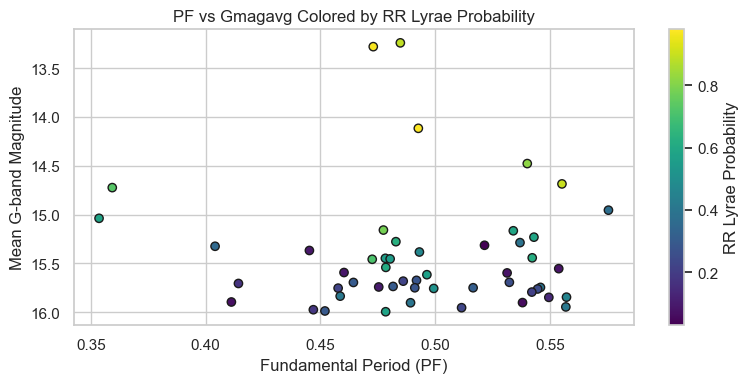

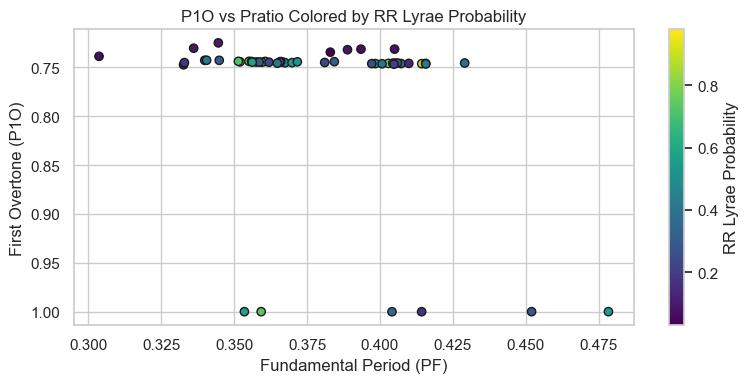

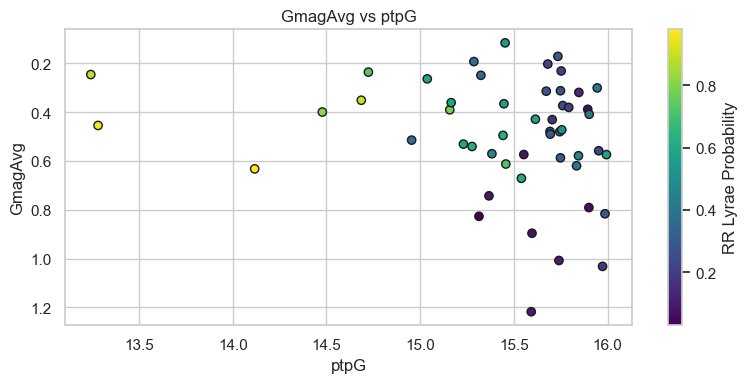

In [85]:
###############################
#####  ASTR 3300 Project  #####
##### SeungJun Ryu (June) #####
###############################

# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data
rrl_g = pd.read_csv("./RRL_G.csv")
rrl_ng = pd.read_csv("./RRL_nG.csv")

# Label confirmed RR Lyrae
rrl_g['label'] = 1

# negative from part of rrl_ng
rrl_ng_negative = rrl_ng.sample(n=len(rrl_g), random_state=42).copy()
rrl_ng_negative['label'] = 0

# Combine for training
training_data = pd.concat([rrl_g, rrl_ng_negative], ignore_index=True)

# Define features
features = [
    'PF', 'P1O', 'Gmagavg', 'BPmagavg', 'RPmagavg',
    'ptpG', 'ptpRV', 'R21G', 'R31G', 'phi21G', 'phi31G',
    'FuNFreq1', 'FuNFreq2', 'Pratio'
]

# Fill missing values
X_train = training_data[features].fillna(training_data[features].mean())
y_train = training_data['label']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=45)
clf.fit(X_train_scaled, y_train)

# Predict on entire rrl_ng dataset (excluding those used for negative training)
rrl_ng_eval = rrl_ng.drop(index=rrl_ng_negative.index, errors='ignore').copy()
X_target_scaled = scaler.transform(rrl_ng_eval[features].fillna(training_data[features].mean()))
rrl_ng_eval['predicted_label'] = clf.predict(X_target_scaled)
rrl_ng_eval['RR_probability'] = clf.predict_proba(X_target_scaled)[:, 1]

# Visualisation
import seaborn as sns
sns.set(style="whitegrid")


# Scatter plot of Period (PF) vs G-band magnitude, colored by probability
plt.figure(figsize=(8, 4))
sc = plt.scatter(rrl_ng_eval['PF'], rrl_ng_eval['Gmagavg'], 
                 c=rrl_ng_eval['RR_probability'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='RR Lyrae Probability')
plt.title("PF vs Gmagavg Colored by RR Lyrae Probability")
plt.xlabel("Fundamental Period (PF)")
plt.ylabel("Mean G-band Magnitude")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sc = plt.scatter(rrl_ng_eval['P1O'], rrl_ng_eval['Pratio'], 
                 c=rrl_ng_eval['RR_probability'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='RR Lyrae Probability')
plt.title("P1O vs Pratio Colored by RR Lyrae Probability")
plt.xlabel("Fundamental Period (PF)")
plt.ylabel("First Overtone (P1O)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sc = plt.scatter(rrl_ng_eval['Gmagavg'], rrl_ng_eval['ptpG'], 
                 c=rrl_ng_eval['RR_probability'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='RR Lyrae Probability')
plt.title("GmagAvg vs ptpG")
plt.xlabel("ptpG")
plt.ylabel("GmagAvg")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

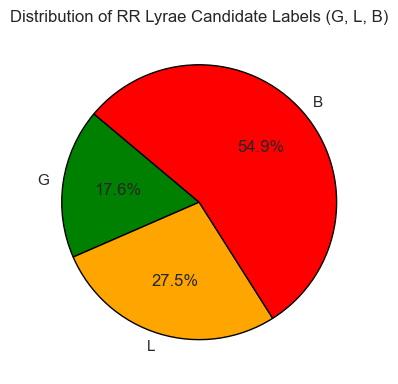

RR_label
G     9
L    14
B    28
Name: count, dtype: int64

In [65]:
# import
import pandas as pd
import matplotlib.pyplot as plt

# Reload data files
rrl_g = pd.read_csv("./RRL_G.csv")
rrl_ng = pd.read_csv("./RRL_nG.csv")

# Rebuild training and model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Label confirmed RR Lyrae
rrl_g['label'] = 1

# Simulate a negative class from part of rrl_ng
rrl_ng_negative = rrl_ng.sample(n=len(rrl_g), random_state=45).copy()
rrl_ng_negative['label'] = 0

# Combine training data
training_data = pd.concat([rrl_g, rrl_ng_negative], ignore_index=True)

# Define features
features = [
    'PF', 'P1O', 'Gmagavg', 'BPmagavg', 'RPmagavg',
    'ptpG', 'ptpRV', 'R21G', 'R31G', 'phi21G', 'phi31G',
    'FuNFreq1', 'FuNFreq2', 'Pratio'
]

# Fill missing values and scale features
X_train = training_data[features].fillna(training_data[features].mean())
y_train = training_data['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=45)
clf.fit(X_train_scaled, y_train)

# Predict on remaining rrl_ng entries
rrl_ng_eval = rrl_ng.drop(index=rrl_ng_negative.index, errors='ignore').copy()
X_target_scaled = scaler.transform(rrl_ng_eval[features].fillna(training_data[features].mean()))
rrl_ng_eval['predicted_label'] = clf.predict(X_target_scaled)
rrl_ng_eval['RR_probability'] = clf.predict_proba(X_target_scaled)[:, 1]

# Categorize stars based on RR Lyrae probability
def label_star(prob):
    if prob > 0.75:
        return 'G'  # Good candidate
    elif prob < 0.5:
        return 'B'  # Bad candidate
    else:
        return 'L'  # Needs a Look

rrl_ng_eval['RR_label'] = rrl_ng_eval['RR_probability'].apply(label_star)

# Count labels
label_counts = rrl_ng_eval['RR_label'].value_counts().reindex(['G', 'L', 'B'], fill_value=0)

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['green', 'orange', 'red'], wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of RR Lyrae Candidate Labels (G, L, B)")
plt.tight_layout()
plt.show()

label_counts


/var/folders/h1/kqtnsfh94qlfjmw5vf4wkdkh0000gn/T/ipykernel_20638/3917221994.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


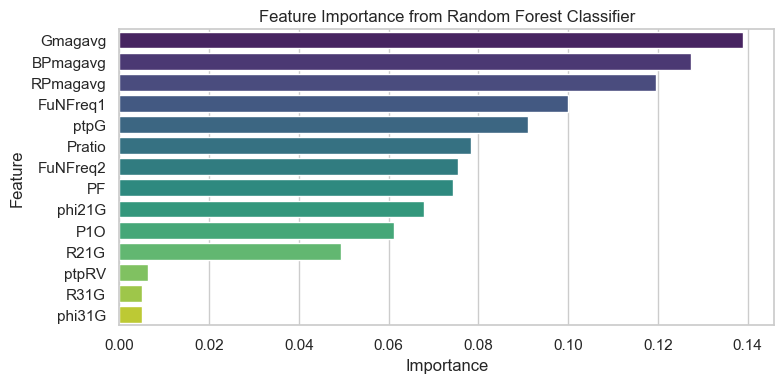

In [67]:
# Feature importance
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest Classifier")
plt.tight_layout()
plt.show()

## Modifying training / target datasets

### 1. Re-label datasets
First, we label both good and bad datasets for training to see how it affects.


In [ ]:
# python cell #

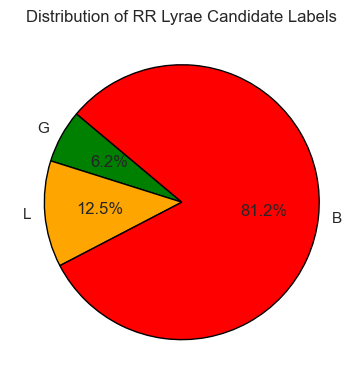

RR_label
G      9
L     18
B    117
Name: count, dtype: int64


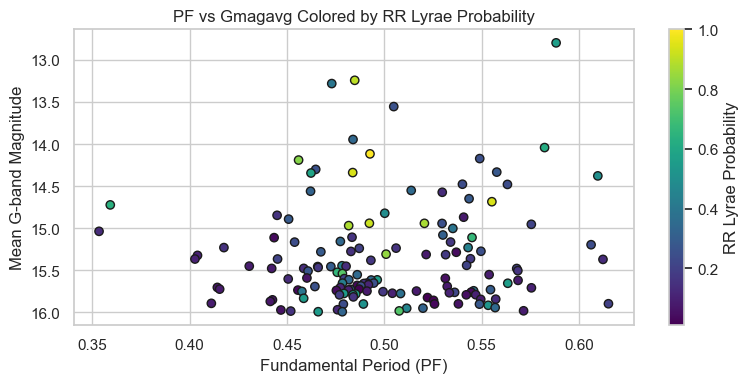

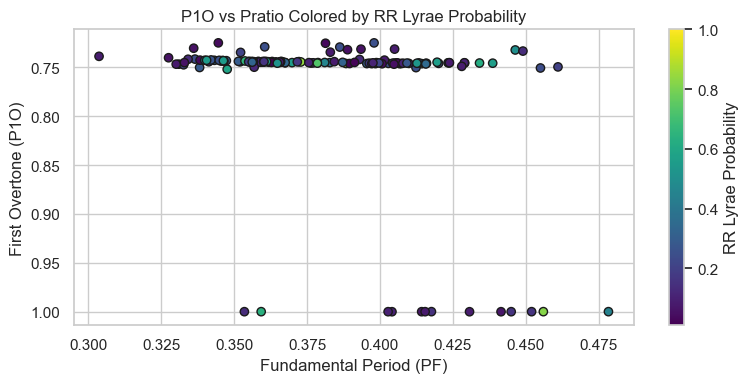

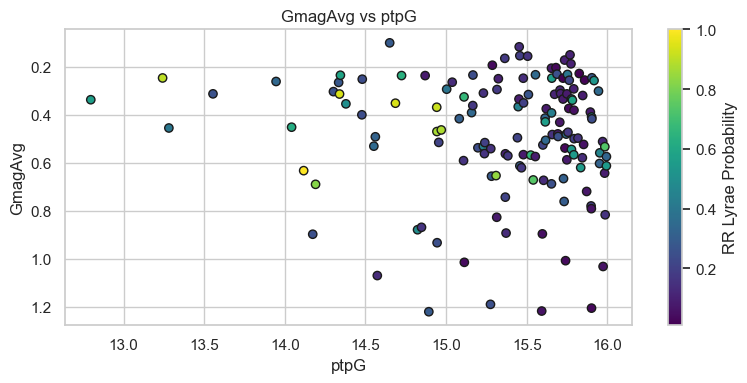

In [79]:
########## Labeling both good and bad ##########

# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load files
rrl_g = pd.read_csv("./RRL_G.csv")       # confirmed RR Lyrae
rrl_b = pd.read_csv("./RRL_B.csv")       # confirmed NOT RR Lyrae
rrl_eval = pd.read_csv("./RRL_nG.csv")   # unknown stars

# Label the training data
rrl_g['label'] = 1
rrl_b['label'] = 0

# Combine for training
training_data = pd.concat([rrl_g, rrl_b], ignore_index=True)

# Define features
features = [
    'PF', 'P1O', 'Gmagavg', 'BPmagavg', 'RPmagavg',
    'ptpG', 'ptpRV', 'R21G', 'R31G', 'phi21G', 'phi31G',
    'FuNFreq1', 'FuNFreq2', 'Pratio'
]

# Fill missing and scale
X_train = training_data[features].fillna(training_data[features].mean())
y_train = training_data['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=45)
clf.fit(X_train_scaled, y_train)

# Prepare unknown stars
X_eval = rrl_eval[features].fillna(training_data[features].mean())
X_eval_scaled = scaler.transform(X_eval)

# Predict
rrl_eval['predicted_label'] = clf.predict(X_eval_scaled)
rrl_eval['RR_probability'] = clf.predict_proba(X_eval_scaled)[:, 1]

def label_star(prob):
    if prob > 0.75:
        return 'G'
    elif prob < 0.5:
        return 'B'
    else:
        return 'L'

rrl_eval['RR_label'] = rrl_eval['RR_probability'].apply(label_star)

import matplotlib.pyplot as plt

label_counts = rrl_eval['RR_label'].value_counts().reindex(['G', 'L', 'B'], fill_value=0)

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['green', 'orange', 'red'], wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of RR Lyrae Candidate Labels")
plt.tight_layout()
plt.show()

print(label_counts)


# more plots
plt.figure(figsize=(8, 4))
sc = plt.scatter(rrl_eval['PF'], rrl_eval['Gmagavg'], 
                 c=rrl_eval['RR_probability'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='RR Lyrae Probability')
plt.title("PF vs Gmagavg Colored by RR Lyrae Probability")
plt.xlabel("Fundamental Period (PF)")
plt.ylabel("Mean G-band Magnitude")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sc = plt.scatter(rrl_eval['P1O'], rrl_eval['Pratio'], 
                 c=rrl_eval['RR_probability'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='RR Lyrae Probability')
plt.title("P1O vs Pratio Colored by RR Lyrae Probability")
plt.xlabel("Fundamental Period (PF)")
plt.ylabel("First Overtone (P1O)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sc = plt.scatter(rrl_eval['Gmagavg'], rrl_eval['ptpG'], 
                 c=rrl_eval['RR_probability'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='RR Lyrae Probability')
plt.title("GmagAvg vs ptpG")
plt.xlabel("ptpG")
plt.ylabel("GmagAvg")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Dimentionality Reduction
From the presentation, I got a comment to try Dimentionality Reduction. (Use less columns based on feature importances). 
Below is using 4 features. Top 3 features of Gmagavg, BPmagavg, RPmagavg and ptpG.

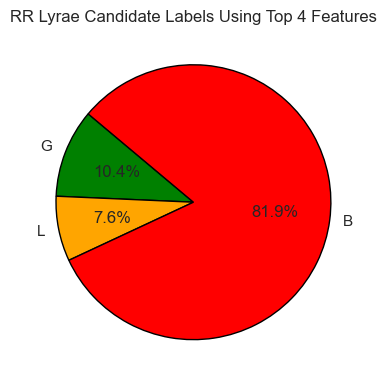

RR_label
G     15
L     11
B    118
Name: count, dtype: int64

In [101]:
########## Dimentionality Reduction ##########

# Load data
rrl_g = pd.read_csv("./RRL_G.csv")
rrl_b = pd.read_csv("./RRL_B.csv")
rrl_eval = pd.read_csv("./RRL_nG.csv")

# Assign labels
rrl_g['label'] = 1
rrl_b['label'] = 0
training_data = pd.concat([rrl_g, rrl_b], ignore_index=True)

# 4 features from above (feature importance)
features = ['Gmagavg', 'ptpG', 'BPmagavg', 'RPmagavg']

# Preprocess training data
X_train = training_data[features].fillna(training_data[features].mean())
y_train = training_data['label']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=45)
clf.fit(X_train_scaled, y_train)

# Predict on evaluation data
X_eval = rrl_eval[features].fillna(training_data[features].mean())
X_eval_scaled = scaler.transform(X_eval)
rrl_eval['predicted_label'] = clf.predict(X_eval_scaled)
rrl_eval['RR_probability'] = clf.predict_proba(X_eval_scaled)[:, 1]

# Labeling function
def label_star(prob):
    if prob > 0.75:
        return 'G'
    elif prob < 0.5:
        return 'B'
    else:
        return 'L'

rrl_eval['RR_label'] = rrl_eval['RR_probability'].apply(label_star)


# Pie chart
label_counts = rrl_eval['RR_label'].value_counts().reindex(['G', 'L', 'B'], fill_value=0)
plt.figure(figsize=(4,4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['green', 'orange', 'red'], wedgeprops={'edgecolor': 'black'})
plt.title("RR Lyrae Candidate Labels Using Top 4 Features")
plt.tight_layout()
plt.show()

label_counts



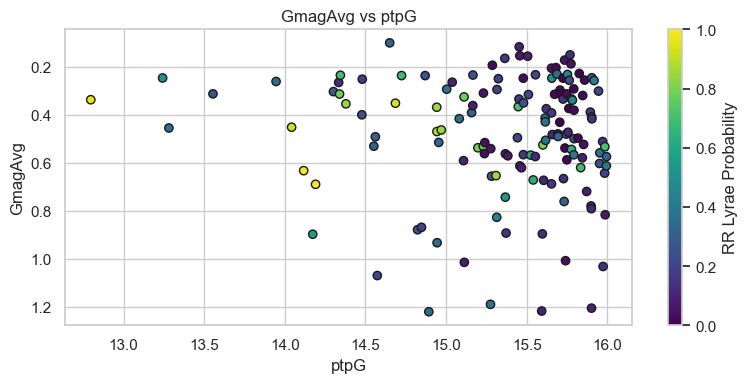

In [103]:
# plots
plt.figure(figsize=(8, 4))
sc = plt.scatter(rrl_eval['Gmagavg'], rrl_eval['ptpG'], 
                 c=rrl_eval['RR_probability'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='RR Lyrae Probability')
plt.title("GmagAvg vs ptpG")
plt.xlabel("ptpG")
plt.ylabel("GmagAvg")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Other methods
Another comment from the presentation was to try other models. A simple model to try would be Logistic Regression.


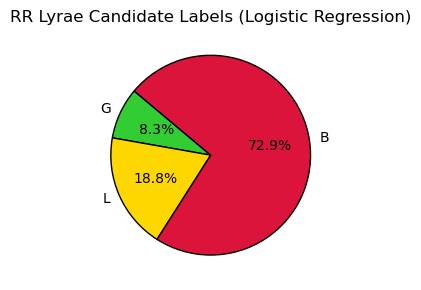

RR_label
G     12
L     27
B    105
Name: count, dtype: int64


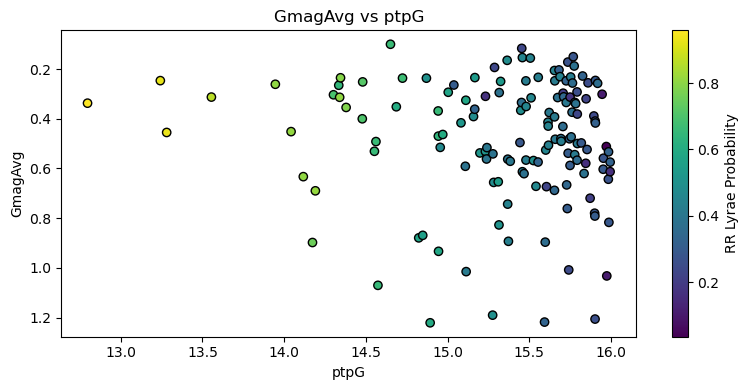

In [2]:
##### Other Model - Logistic Regression #####

# import
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load data
rrl_g = pd.read_csv("./RRL_G.csv")        # Confirmed RR Lyrae
rrl_b = pd.read_csv("./RRL_B.csv")        # Confirmed NOT RR Lyrae
rrl_eval = pd.read_csv("./RRL_nG.csv")    # Unknown candidates

# Add labels
rrl_g['label'] = 1
rrl_b['label'] = 0
training_data = pd.concat([rrl_g, rrl_b], ignore_index=True)

# Use only the top 4 features
features = ['Gmagavg', 'ptpG', 'BPmagavg', 'RPmagavg']

# Training data
X_train = training_data[features].fillna(training_data[features].mean())
y_train = training_data['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train logistic regression model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Evaluation data
X_eval = rrl_eval[features].fillna(training_data[features].mean())
X_eval_scaled = scaler.transform(X_eval)

# Predict labels and probabilities
rrl_eval['predicted_label'] = clf.predict(X_eval_scaled)
rrl_eval['RR_probability'] = clf.predict_proba(X_eval_scaled)[:, 1]

# Labeling prob
def label_star(prob):
    if prob > 0.75:
        return 'G'
    elif prob < 0.5:
        return 'B'
    else:
        return 'L'

rrl_eval['RR_label'] = rrl_eval['RR_probability'].apply(label_star)

# Pie chart visualization
label_counts = rrl_eval['RR_label'].value_counts().reindex(['G', 'L', 'B'], fill_value=0)
plt.figure(figsize=(3, 3))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['limegreen', 'gold', 'crimson'], wedgeprops={'edgecolor': 'black'})
plt.title("RR Lyrae Candidate Labels (Logistic Regression)")
plt.tight_layout()
plt.show()

print(label_counts)

# plots
plt.figure(figsize=(8, 4))
sc = plt.scatter(rrl_eval['Gmagavg'], rrl_eval['ptpG'], 
                 c=rrl_eval['RR_probability'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='RR Lyrae Probability')
plt.title("GmagAvg vs ptpG")
plt.xlabel("ptpG")
plt.ylabel("GmagAvg")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()